In [1]:
import os
from collections.abc import Callable, Iterable

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
save_vis = True

output_dir = 'dataset_analysis_media'
if not os.path.exists(os.path.abspath(output_dir)):
    os.mkdir(output_dir)

Прочитаем таблицу и добавим столбцы с числовыми кодами для категориального и бинарного признаков. Добавим столбец **is_in_spotify_charts** с бинарными значениями - это тот признак, по которому мы будем проводить классификацию.

In [3]:
dataset = pd.read_csv('/home/rito4ka/dev/magistratura/miptml_projects/songs_classification/spotify-2023.csv', encoding='latin-1')
dataset['key'] = pd.Categorical(dataset['key'])
dataset['key_code'] = dataset['key'].cat.codes
dataset['mode'] = pd.Categorical(dataset['mode'])
dataset['mode_code'] = dataset['mode'].cat.codes
dataset['in_deezer_playlists'] = [int(item.replace(',', '')) for item in dataset['in_deezer_playlists']]
dataset['in_shazam_charts'] = [int(item.replace(',', '')) if isinstance(item, str) else item
                               for item in dataset['in_shazam_charts']]

dataset['is_in_spotify_charts'] = [int(bool(item)) for item in dataset['in_spotify_charts']]
dataset['in_shazam_charts'] = dataset['in_shazam_charts'].fillna(0) # Мы не любим сложных путей + эту колонку мы не планируем использовать
dataset.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_code,mode_code,is_in_spotify_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,80,89,83,31,0,8,4,2,0,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,71,61,74,7,0,10,4,3,0,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,51,32,53,17,0,31,6,7,0,1
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,55,58,72,11,0,11,15,0,0,1
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,65,23,80,14,63,11,6,0,1,1


In [4]:
print(list(dataset))

['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'key_code', 'mode_code', 'is_in_spotify_charts']


Для начала исследуем признак, по которому будем проводить классификацию: **in_spotify_charts**.

In [5]:
in_charts = np.sum(dataset['is_in_spotify_charts'])
not_in_charts = len(dataset['is_in_spotify_charts']) - in_charts

print(f'Всего песен, которые вошли в чарты Spotify:', 
      f'{in_charts}, ({100 * in_charts / (in_charts + not_in_charts):.1f} %)')
print(f'Песен, которые не вошли в чарты Spotify:   ',
      f'{not_in_charts}, ({100 * not_in_charts / (in_charts + not_in_charts):.1f} %)')

Всего песен, которые вошли в чарты Spotify: 548, (57.5 %)
Песен, которые не вошли в чарты Spotify:    405, (42.5 %)


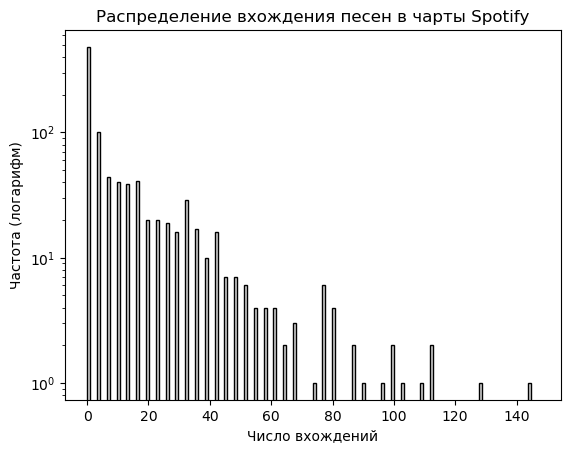

<Figure size 640x480 with 0 Axes>

In [6]:
plt.hist(dataset['in_spotify_charts'], bins='auto', width=1., alpha=1., color='lightgrey', edgecolor='black')
plt.title('Распределение вхождения песен в чарты Spotify')
plt.xlabel('Число вхождений')
plt.ylabel('Частота (логарифм)')
plt.yscale('log')
if save_vis:
    plt.savefig(os.path.join(output_dir, 'in_spotify_charts_count.jpg'))
plt.show()
plt.clf()

Исследуем **разнообразие исполнителей** и **сезонность**.

In [7]:
print(f'Число уникальных исполнителей: {len(set(dataset["artist(s)_name"]))}')

Число уникальных исполнителей: 645


Наиболее успешные артисты:

In [8]:
dataset.copy()['artist(s)_name'].value_counts().reset_index()

,index,artist(s)_name
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17
...,...,...
640,"Karol G, Ovy On The Drums",1
641,"Coolio, L.V.",1
642,Kordhell,1
643,Kenia OS,1


Посмотрим на распределение по числу исполнителей:

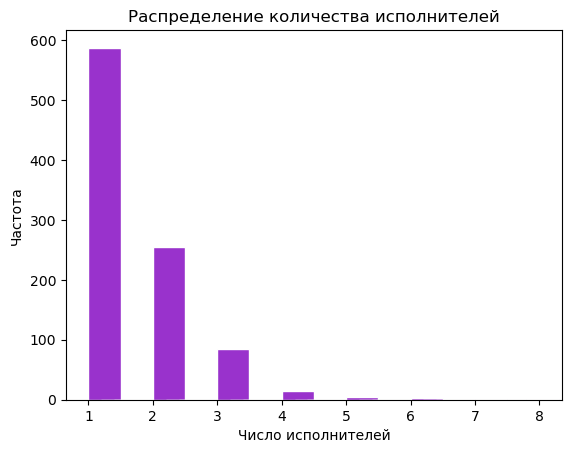

<Figure size 640x480 with 0 Axes>

In [9]:
plt.hist(dataset['artist_count'], bins='auto', width=0.5, alpha=1., color='darkorchid', edgecolor='white')
plt.title('Распределение количества исполнителей')
plt.xlabel('Число исполнителей')
plt.ylabel('Частота')
if save_vis:
    plt.savefig(os.path.join(output_dir, 'artists_count.jpg'))
plt.show()
plt.clf()

И в логарифмическом масштабе:

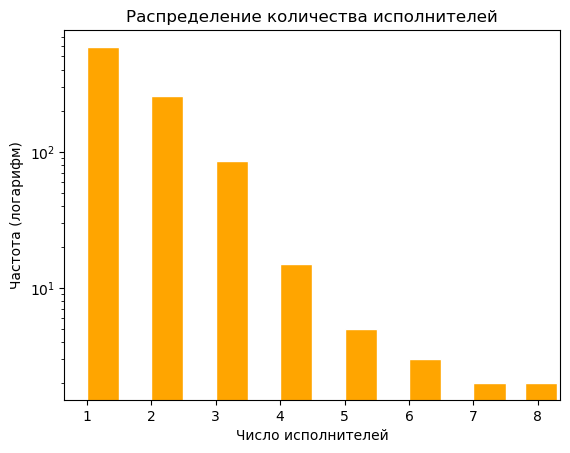

<Figure size 640x480 with 0 Axes>

In [10]:
plt.hist(dataset['artist_count'], bins='auto', width=0.5, alpha=1., color='orange', edgecolor='white')
plt.yscale('log')
plt.title('Распределение количества исполнителей')
plt.xlabel('Число исполнителей')
plt.ylabel('Частота (логарифм)')
if save_vis:
    plt.savefig(os.path.join(output_dir, 'artists_count_log.jpg'))
plt.show()
plt.clf()

Посмотрим на распределение годов выпуска песен:

In [11]:
dataset.copy()['released_year'].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,released_year
1,2023,175
0,2022,402
2,2021,119
3,2020,37
4,2019,36
10,2018,10
5,2017,23
6,2016,18
9,2015,11
7,2014,13


Посмотрим на диаграмму для сезонных штук:

<Figure size 800x800 with 0 Axes>

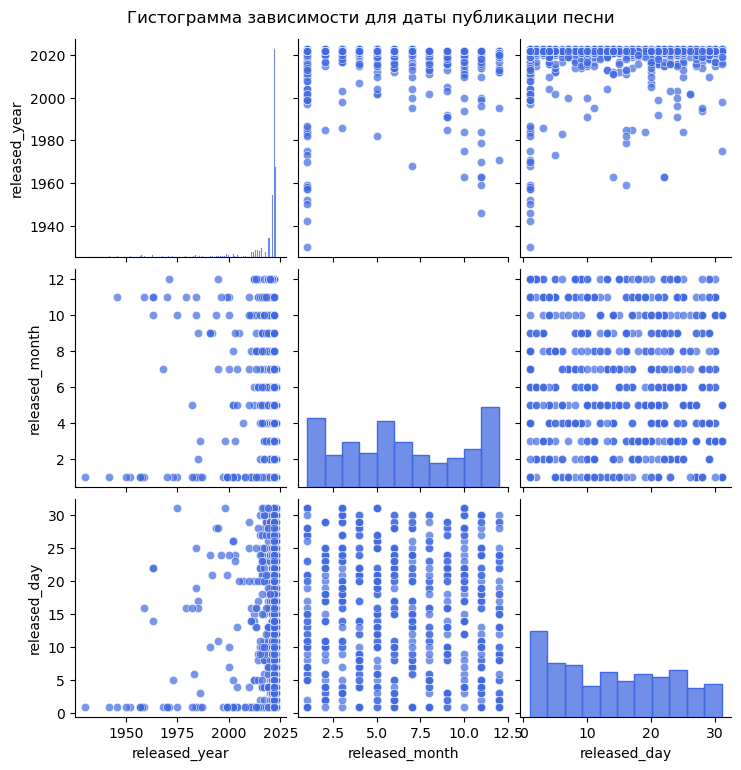

<Figure size 640x480 with 0 Axes>

In [12]:
datas = dataset[['released_year', 'released_month', 'released_day']]

plt.figure(figsize=(8, 8))
sns.pairplot(
    datas, # corner=True,
    plot_kws=dict(color='royalblue', alpha=0.7),
    diag_kws=dict(color='royalblue', edgecolor='royalblue')
)
plt.suptitle('Гистограмма зависимости для даты публикации песни', y=1.02)
if save_vis:
    plt.savefig(os.path.join(output_dir, 'date.jpg'), bbox_inches="tight")
plt.show()
plt.clf()

Исследуем распределение по **вхождению треков в чарты и плейлисты** (а также **число прослушиваний**).

<Figure size 800x800 with 0 Axes>

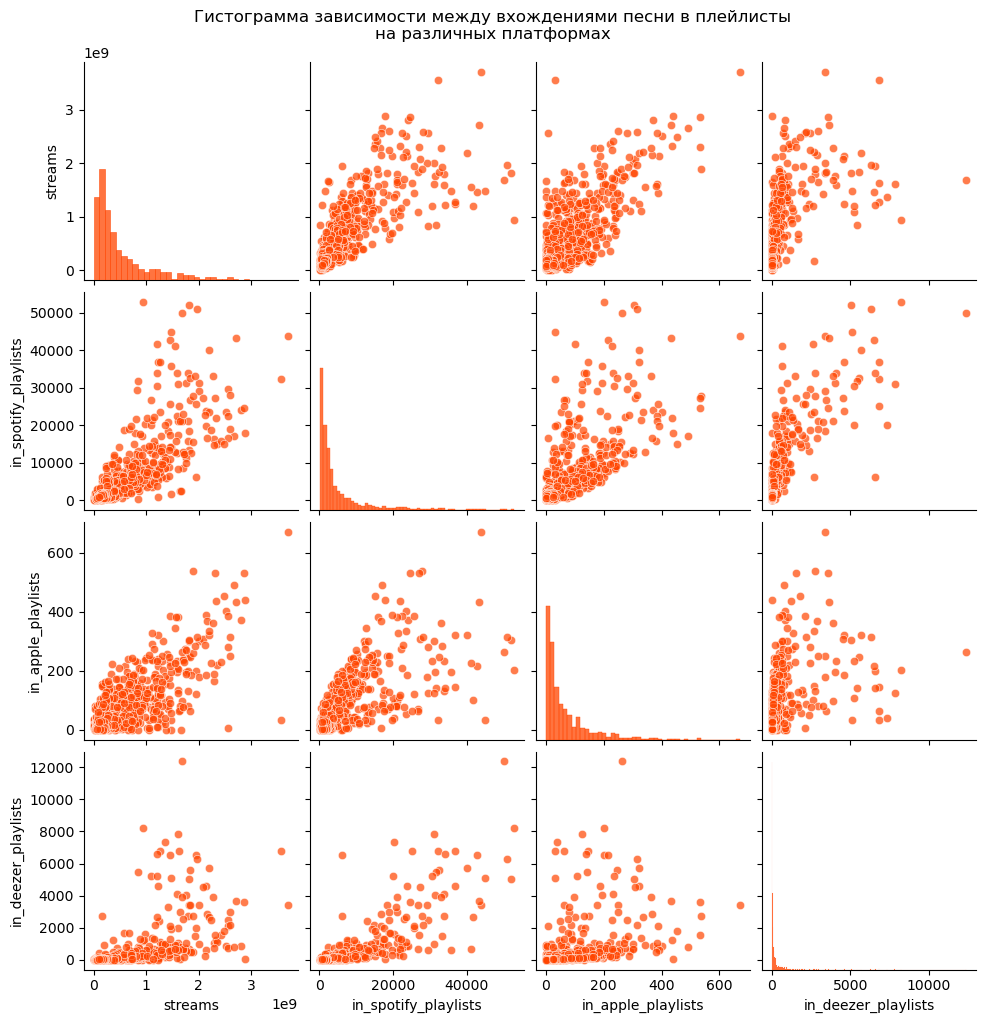

<Figure size 640x480 with 0 Axes>

In [13]:
playlists = dataset[['streams', 'in_spotify_playlists', 'in_apple_playlists',
                 'in_deezer_playlists']]

plt.figure(figsize=(8, 8))
sns.pairplot(
    playlists, # corner=True,
    plot_kws=dict(color='orangered', alpha=0.7),
    diag_kws=dict(color='orangered', edgecolor='orangered')
)
plt.suptitle('Гистограмма зависимости между вхождениями песни в плейлисты\nна различных платформах', y=1.02)
if save_vis:
    plt.savefig(os.path.join(output_dir, 'playlists.jpg'), bbox_inches="tight")
plt.show()
plt.clf()

<Figure size 800x800 with 0 Axes>

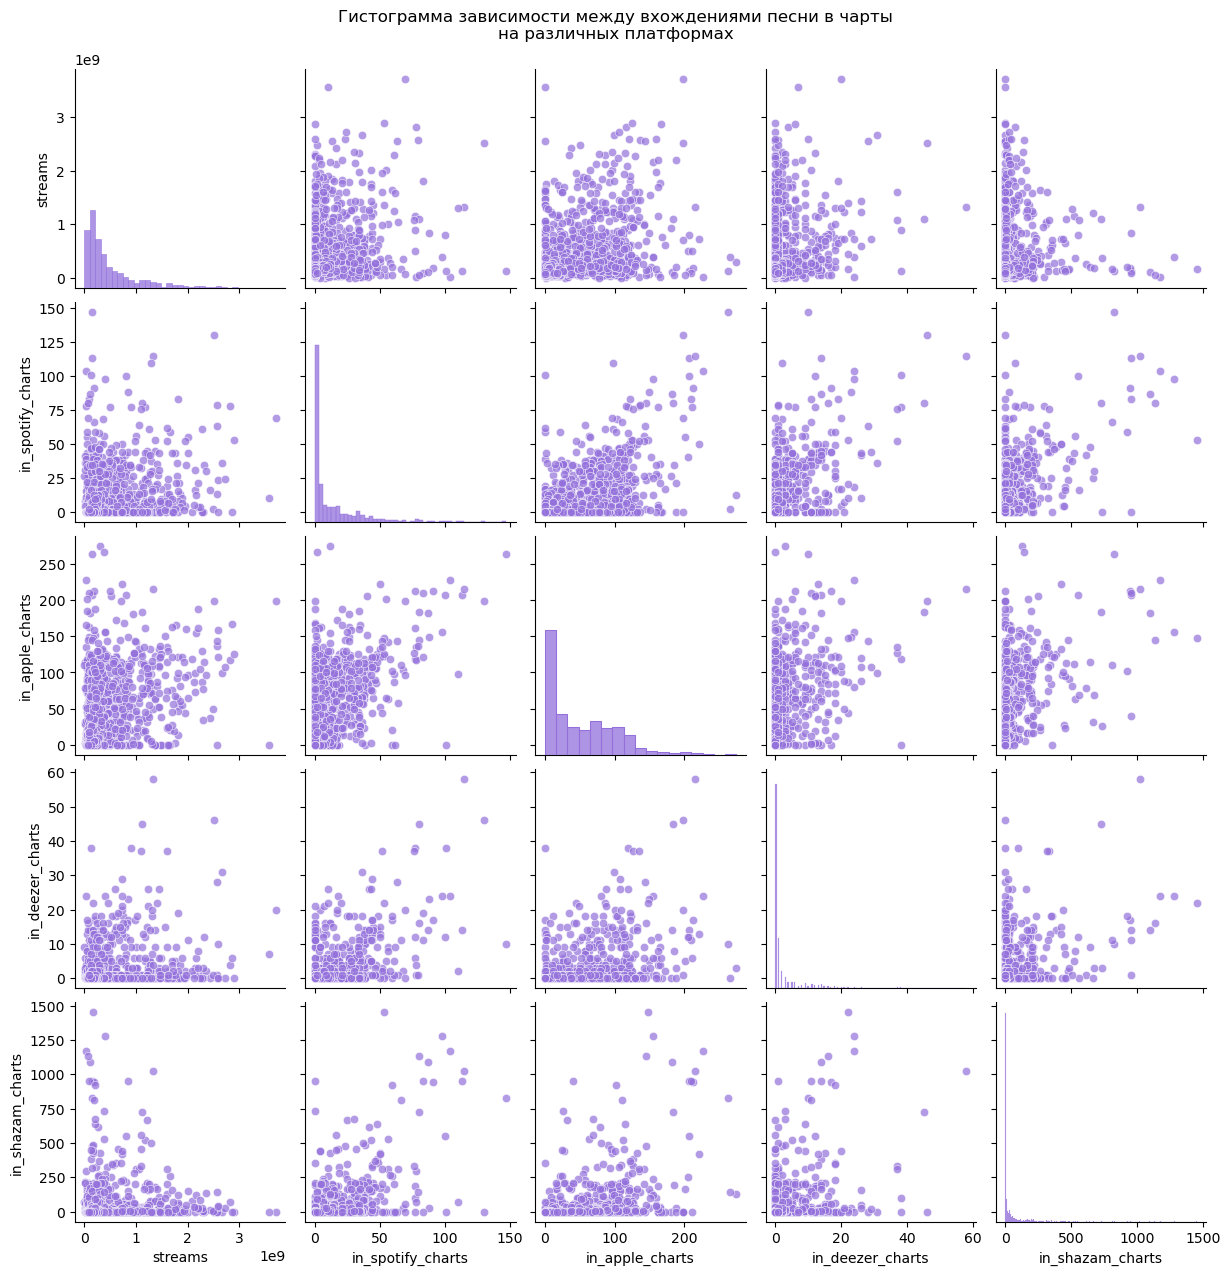

<Figure size 640x480 with 0 Axes>

In [14]:
charts = dataset[['streams', 'in_spotify_charts',
                 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

plt.figure(figsize=(8, 8))
sns.pairplot(
    charts, # corner=True,
    plot_kws=dict(color='mediumpurple', alpha=0.7),
    diag_kws=dict(color='mediumpurple', edgecolor='mediumpurple')
)
plt.suptitle('Гистограмма зависимости между вхождениями песни в чарты\nна различных платформах', y=1.02)
if save_vis:
    plt.savefig(os.path.join(output_dir, 'charts.jpg'), bbox_inches="tight")
plt.show()
plt.clf()

Посмотрим на признаки-**характеристики** песен:

<Figure size 800x800 with 0 Axes>

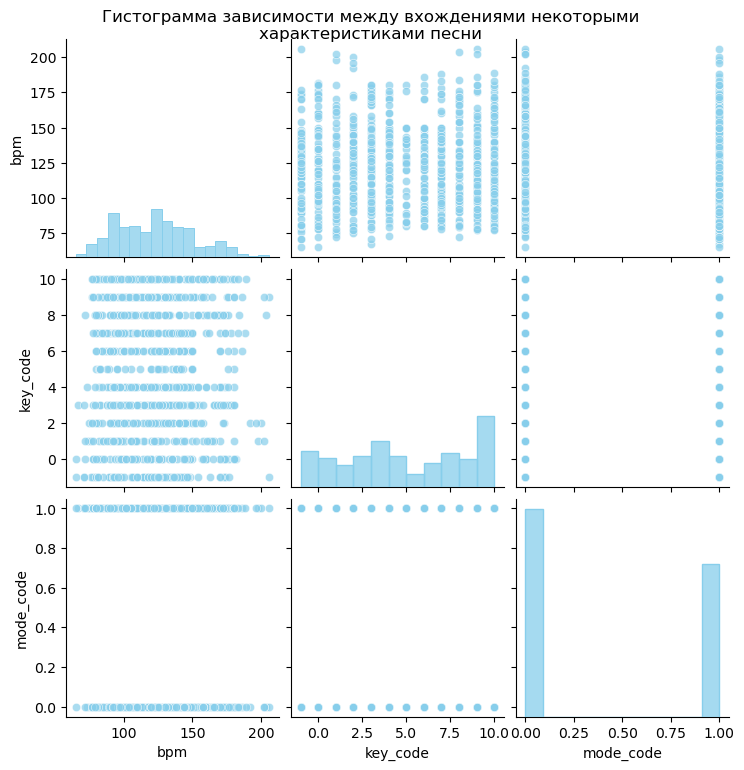

<Figure size 640x480 with 0 Axes>

In [15]:
characteristics = dataset[[
    'bpm', 'key_code', 'mode_code',
]]

plt.figure(figsize=(8, 8))
sns.pairplot(
    characteristics, # corner=True,
    plot_kws=dict(color='skyblue', alpha=0.7),
    diag_kws=dict(color='skyblue', edgecolor='skyblue')
)
plt.suptitle('Гистограмма зависимости между вхождениями некоторыми\nхарактеристиками песни', y=1.02)
if save_vis:
    plt.savefig(os.path.join(output_dir, 'bpm-key-mode.jpg'), bbox_inches="tight")
plt.show()
plt.clf()

<Figure size 800x800 with 0 Axes>

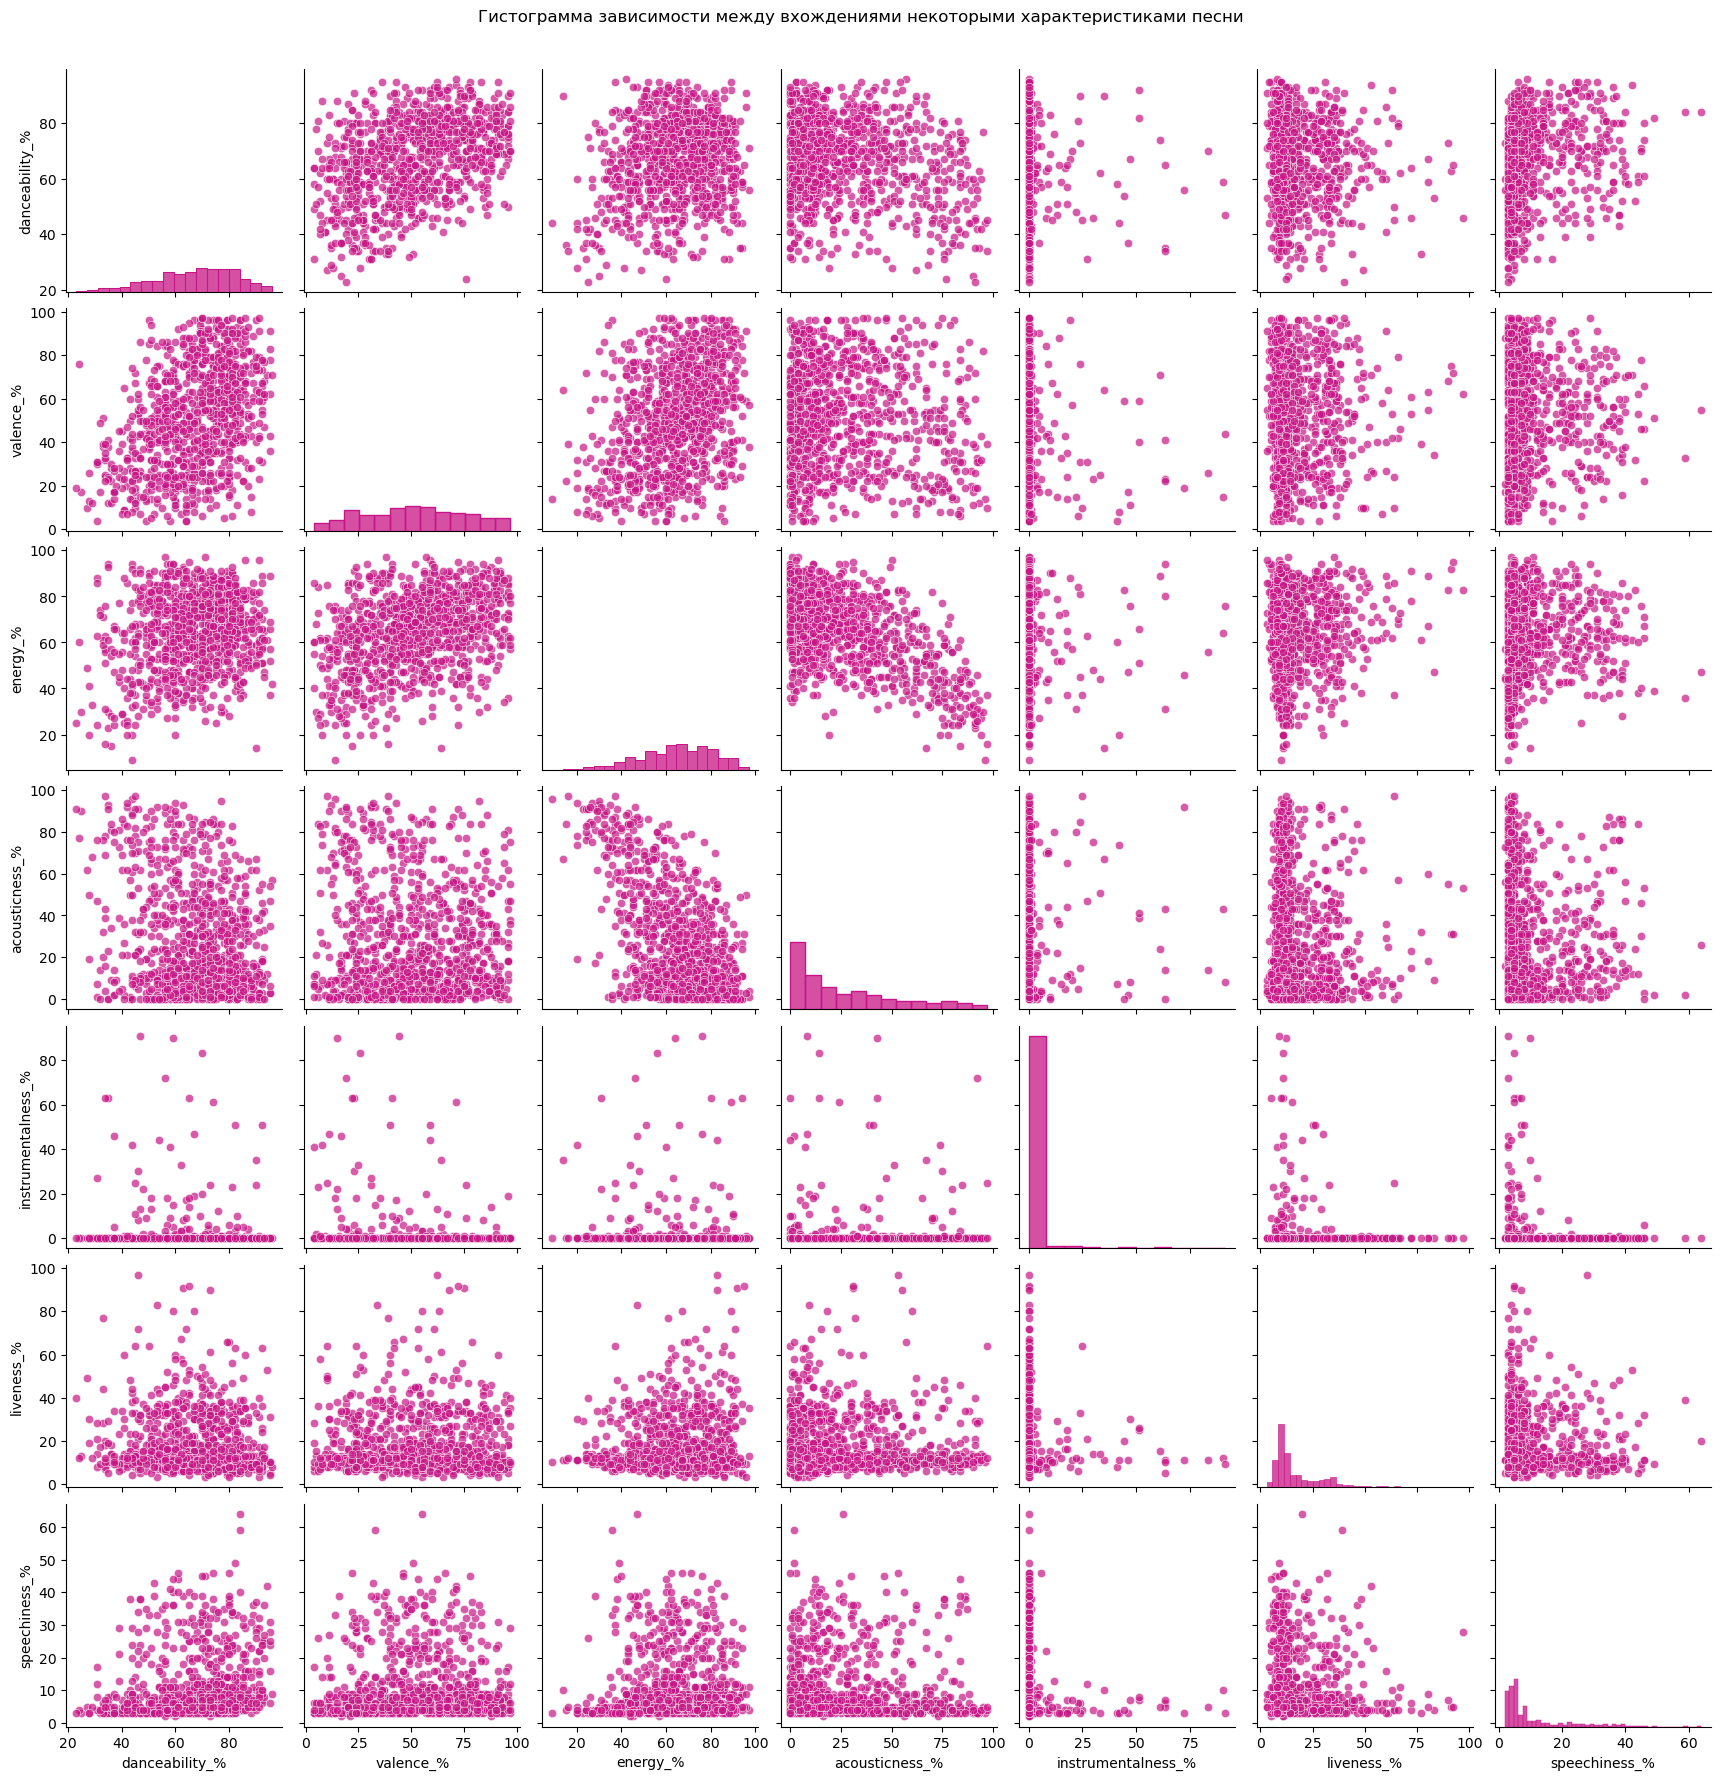

<Figure size 640x480 with 0 Axes>

In [16]:
characteristics = dataset[[
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]]

plt.figure(figsize=(8, 8))
sns.pairplot(
    characteristics, # corner=True,
    plot_kws=dict(color='mediumvioletred', alpha=0.7),
    diag_kws=dict(color='mediumvioletred', edgecolor='mediumvioletred')
)
plt.suptitle('Гистограмма зависимости между вхождениями некоторыми характеристиками песни', y=1.02)
if save_vis:
    plt.savefig(os.path.join(output_dir, 'percent.jpg'), bbox_inches="tight")
plt.show()
plt.clf()

Исследуем **корелляцию** между признаком **in_spotify_charts** и другими признаками.

/tmp/ipykernel_988882/536424215.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(method='pearson'), annot=False, cmap=sns.color_palette("YlOrBr", as_cmap=True))


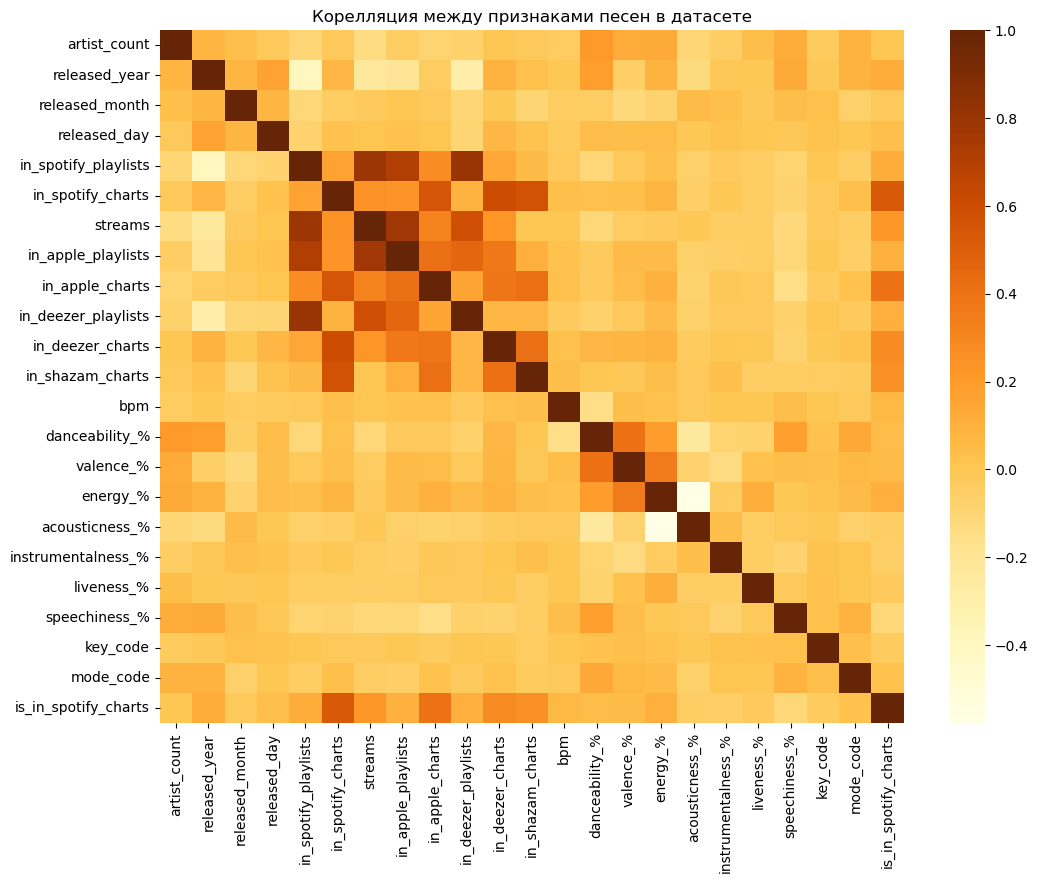

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(12, 9))

sns.heatmap(dataset.corr(method='pearson'), annot=False, cmap=sns.color_palette("YlOrBr", as_cmap=True))
plt.title('Корелляция между признаками песен в датасете')
if save_vis:
    plt.savefig(os.path.join(output_dir, 'corr_full.jpg'), bbox_inches="tight")
plt.show()
plt.clf()

Рассмотрим детальнее группу признаков, связанных с представленностью и популярностью песен на разных платформах:

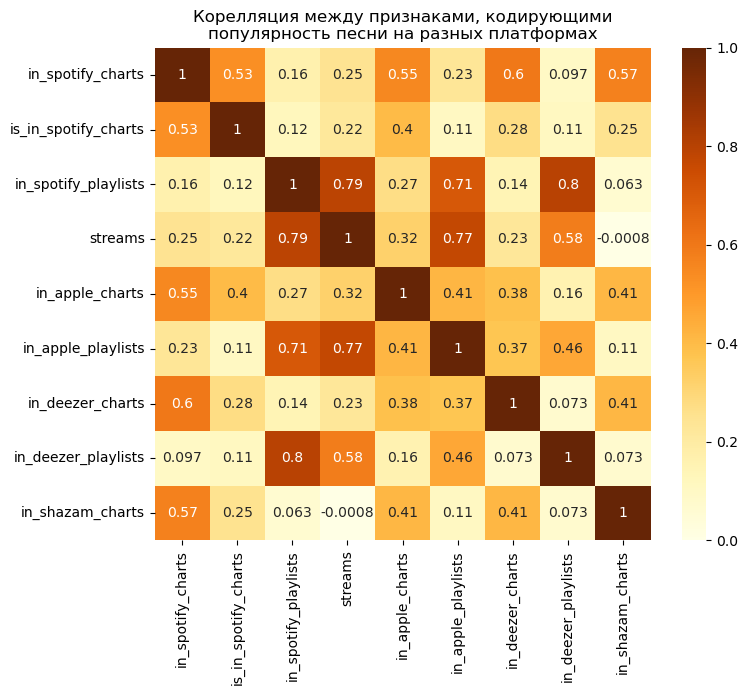

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(8, 6.4))

sns.heatmap(dataset[[
    'in_spotify_charts', 'is_in_spotify_charts', 'in_spotify_playlists', 'streams', 'in_apple_charts',
    'in_apple_playlists', 'in_deezer_charts', 'in_deezer_playlists', 'in_shazam_charts'
]].corr(method='pearson'), annot=True, cmap=sns.color_palette("YlOrBr", as_cmap=True))

plt.title('Корелляция между признаками, кодирующими\nпопулярность песни на разных платформах')
if save_vis:
    plt.savefig(os.path.join(output_dir, 'corr_platforms.jpg'), bbox_inches="tight")
plt.show()
plt.clf()

/tmp/ipykernel_988882/3778599154.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ]].corr(method='pearson'), annot=True, cmap=sns.color_palette("YlOrBr", as_cmap=True))


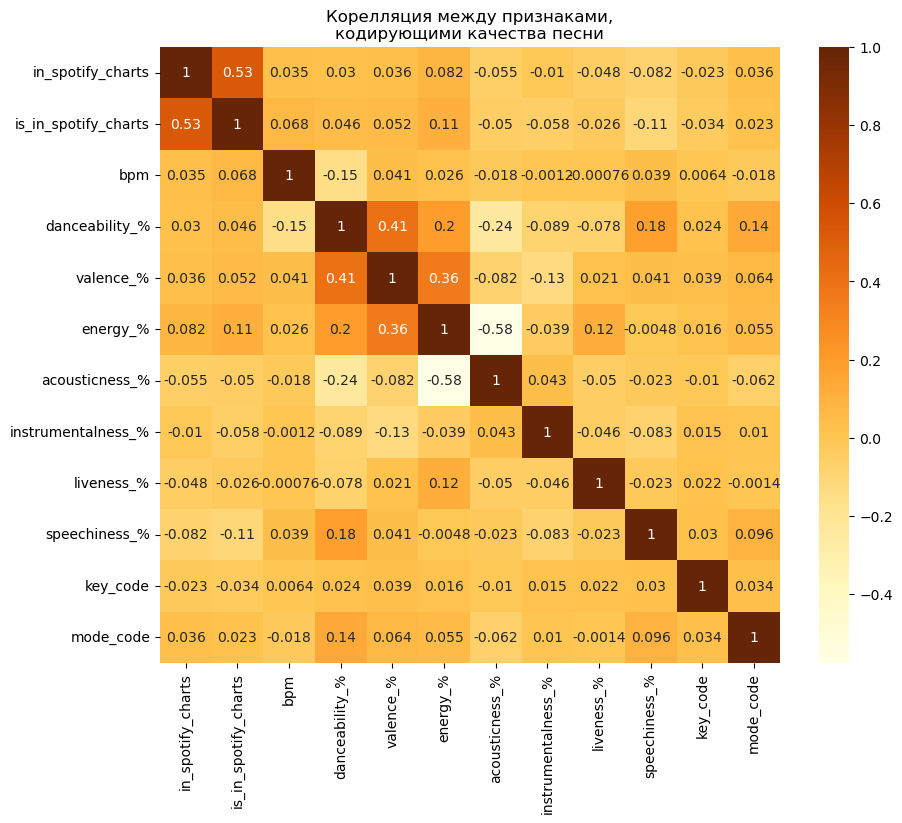

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 8))

sns.heatmap(dataset[[
    'in_spotify_charts', 'is_in_spotify_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'key_code', 'mode_code'
]].corr(method='pearson'), annot=True, cmap=sns.color_palette("YlOrBr", as_cmap=True))

plt.title('Корелляция между признаками,\nкодирующими качества песни')
if save_vis:
    plt.savefig(os.path.join(output_dir, 'corr_quality.jpg'), bbox_inches="tight")
plt.show()
plt.clf()

Сформулируем гипотезу: успех песни зависит от года выпуска и степени энергичности песни.

In [20]:
def niceness(energy:int, released_year:int) -> float:
    return (energy / 100) * (released_year - 1900) # energy in %, min released year is 1930

In [21]:
niceness_values = [niceness(*item) for item in zip(dataset['energy_%'], dataset['released_year'])]

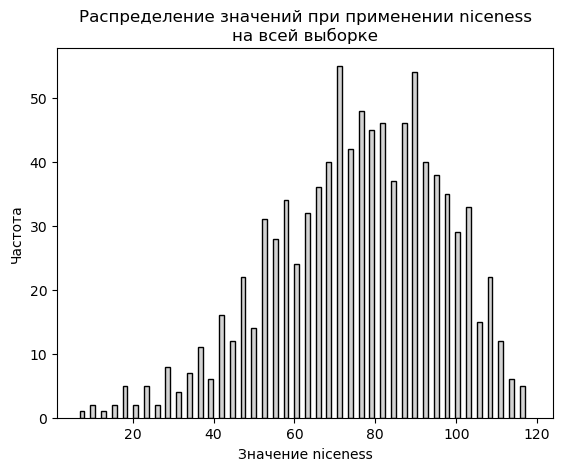

<Figure size 640x480 with 0 Axes>

In [22]:
# plt.figure(figsize=(10, 8))
plt.hist(niceness_values, bins=42, width=1.2, alpha=1., color='lightgrey', edgecolor='black')
plt.title('Распределение значений при применении niceness\nна всей выборке')
plt.xlabel('Значение niceness')
plt.ylabel('Частота')
if save_vis:
    plt.savefig(os.path.join(output_dir, 'niceness.jpg'))
plt.show()
plt.clf()

Построим модель, которая будет возвращать 1 (то есть "песня войдёт в чарт Spotify"), если значение niceness для этой песни больше некоторого _boarder_ и 0 в противном случае. Найдём значение boarder.

In [23]:
def find_acc_f1(X:Iterable, Y:Iterable, boarder:float) -> float: # когда написать быстрее чем гуглить...
    tp = tn = fp = fn = 0
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        pred = 0 if x < boarder else 1
        if pred == 0 and y == 0:
            tn += 1
        if pred == 1 and y == 1:
            tp += 1
        if pred == 0 and y == 1:
            fn += 1
        if pred == 1 and y == 0:
            fp += 1
            
    acc = (tp + tn) / (tp + fp + tn + fn)
    
    prec = tp / (tp + fp + 1e-12)
    rec = tp / (tp + fn + 1e-12)
    f1 = 2 * prec * rec / (prec + rec + 1e-12)
    
    return acc, f1

In [24]:
accs_f1s = np.array([[*find_acc_f1(niceness_values, dataset['is_in_spotify_charts'], item)]
            for item in sorted(niceness_values)])

In [25]:
max_acc = np.max(accs_f1s[:, 0])
max_f1 = np.max(accs_f1s[:, 1])

print(
    f'Максимальное значение Accuracy: {max_acc:.3f},',
    f'достигается при значении boarder {np.array(sorted(niceness_values))[np.where(accs_f1s[:, 0] == max_acc)][0]}'
)
print(
    f'Максимальное значение F1:       {max_f1:.3f},',
    f'достигается при значении boarder {np.array(sorted(niceness_values))[np.where(accs_f1s[:, 1] == max_f1)][0]}'
)

Максимальное значение Accuracy: 0.601, достигается при значении boarder 52.65
Максимальное значение F1:       0.738, достигается при значении boarder 30.0


In [26]:
maxAcc = (max_acc, accs_f1s[:, 1][np.where(accs_f1s[:, 0] == max_acc)][0],
          np.array(sorted(niceness_values))[np.where(accs_f1s[:, 0] == max_acc)][0])
maxF1 = (accs_f1s[:, 0][np.where(accs_f1s[:, 1] == max_f1)][0], max_f1,
         np.array(sorted(niceness_values))[np.where(accs_f1s[:, 1] == max_f1)][0])

print(f'''
            | Accuracy | F1       | boarder
maxAccuracy | {maxAcc[0]:.3f}    | {maxAcc[1]:.3f}    | {maxAcc[2]}
maxF1       | {maxF1[0]:.3f}    | {maxF1[1]:.3f}    | {maxF1[2]}
''')


            | Accuracy | F1       | boarder
maxAccuracy | 0.601    | 0.723    | 52.65
maxF1       | 0.595    | 0.738    | 30.0



Построим зависимость значения метрик от выбора boarder:

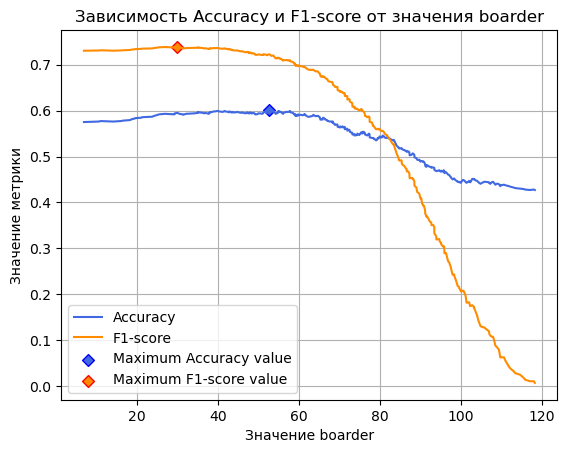

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(sorted(niceness_values), accs_f1s[:, 0], color='royalblue', label='Accuracy')
plt.plot(sorted(niceness_values), accs_f1s[:, 1], color='darkorange', label='F1-score')
plt.scatter(maxAcc[2], maxAcc[0], marker='D', color='royalblue', edgecolors='blue', label='Maximum Accuracy value')
plt.scatter(maxF1[2], maxF1[1], marker='D', color='darkorange', edgecolors='red', label='Maximum F1-score value')
plt.grid()
plt.legend()
plt.title('Зависимость Accuracy и F1-score от значения boarder')
plt.xlabel('Значение boarder')
plt.ylabel('Значение метрики')
if save_vis:
    plt.savefig(os.path.join(output_dir, 'metrics.jpg'))
plt.show()
plt.clf()

Выберем значение boarder равным 52.65 (потому что автору так нравится) и построим модель:

In [28]:
class nicenessModel:
    def __init__(self, boarder:float=52.65):
        self.boarder = boarder
        
    def quality_function(self, energy:int, released_year:int) -> float:
        return (energy / 100) * (released_year - 1900)
    
    def __call__(self, instance:dict):
        if len(set(['energy_%', 'released_year']).intersection(set(instance.keys()))) != 2:
            raise ValueError('bad instance')        
        quality = self.quality_function(instance['energy_%'], instance['released_year'])
        return int(quality >= self.boarder)

In [29]:
model = nicenessModel()

instance = dict(dataset.iloc[42])
result = model(instance)

print(f'Name: {instance["track_name"]}, artist: {instance["artist(s)_name"]},',
      f'prediction: {result}, gt: {instance["is_in_spotify_charts"]}')

Name: I'm Good (Blue), artist: Bebe Rexha, David Guetta, prediction: 1, gt: 1
